# Dataset Genaration

In [ ]:
import numpy as np
import pandas as pd

# -----------------------------
# Configuration
# -----------------------------
N_PATIENTS = 1000
SEQ_LEN = 48  # hours
SEED = 42

np.random.seed(SEED)

# -----------------------------
# Helper function
# -----------------------------
def generate_patient_sequence(patient_id):
    deteriorates = np.random.binomial(1, 0.3)  # 30% deterioration rate
    
    base_hr = np.random.normal(75, 8)
    base_sys_bp = np.random.normal(120, 10)
    base_dia_bp = np.random.normal(75, 6)
    base_rr = np.random.normal(16, 3)
    base_spo2 = np.random.normal(97, 1)
    base_temp = np.random.normal(36.8, 0.3)
    
    base_creatinine = np.random.normal(1.0, 0.2)
    base_wbc = np.random.normal(7.0, 1.5)
    base_lactate = np.random.normal(1.2, 0.3)

    rows = []

    for t in range(SEQ_LEN):
        trend = t / SEQ_LEN if deteriorates else 0

        hr = base_hr + trend * np.random.uniform(10, 25) + np.random.normal(0, 2)
        sys_bp = base_sys_bp - trend * np.random.uniform(15, 30) + np.random.normal(0, 4)
        dia_bp = base_dia_bp - trend * np.random.uniform(8, 15) + np.random.normal(0, 3)
        rr = base_rr + trend * np.random.uniform(5, 10) + np.random.normal(0, 1)
        spo2 = base_spo2 - trend * np.random.uniform(3, 6) + np.random.normal(0, 0.5)
        temp = base_temp + trend * np.random.uniform(0.5, 1.5) + np.random.normal(0, 0.1)

        creatinine = base_creatinine + trend * np.random.uniform(0.5, 1.5)
        wbc = base_wbc + trend * np.random.uniform(2, 6)
        lactate = base_lactate + trend * np.random.uniform(1.0, 3.0)

        rows.append([
            patient_id, t,
            hr, sys_bp, dia_bp, rr, spo2, temp,
            creatinine, wbc, lactate,
            deteriorates
        ])

    return rows

# -----------------------------
# Generate dataset
# -----------------------------
data = []

for pid in range(N_PATIENTS):
    data.extend(generate_patient_sequence(pid))

columns = [
    "patient_id", "hour",
    "heart_rate", "systolic_bp", "diastolic_bp",
    "respiratory_rate", "spo2", "temperature",
    "creatinine", "wbc", "lactate",
    "deterioration_24h"
]

df = pd.DataFrame(data, columns=columns)

# Save
df.to_csv(r"\HealthAI\data\time_seris\synthetic_icu_time_series.csv")

print("Dataset generated:", df.shape)

# Code

In [ ]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv(r"\HealthAI\data\time_seris\synthetic_icu_time_series.csv")

# Basic info
print(df.shape)
df.head()

(48000, 12)


,patient_id,hour,heart_rate,systolic_bp,diastolic_bp,respiratory_rate,spo2,temperature,creatinine,wbc,lactate,deterioration_24h
0,0,0,68.005698,121.476838,74.447027,18.402071,96.717982,36.654671,0.885724,5.613876,0.416235,0
1,0,1,65.074088,120.786467,75.799166,19.018049,95.890266,36.724704,0.885724,5.613876,0.416235,0
2,0,2,63.663272,124.063575,79.319531,18.022461,95.627475,36.507781,0.885724,5.613876,0.416235,0
3,0,3,64.343777,120.481334,78.509277,20.062545,96.884762,36.558527,0.885724,5.613876,0.416235,0
4,0,4,65.486534,127.907887,73.979624,17.993716,96.381220,36.791992,0.885724,5.613876,0.416235,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         48000 non-null  int64  
 1   hour               48000 non-null  int64  
 2   heart_rate         48000 non-null  float64
 3   systolic_bp        48000 non-null  float64
 4   diastolic_bp       48000 non-null  float64
 5   respiratory_rate   48000 non-null  float64
 6   spo2               48000 non-null  float64
 7   temperature        48000 non-null  float64
 8   creatinine         48000 non-null  float64
 9   wbc                48000 non-null  float64
 10  lactate            48000 non-null  float64
 11  deterioration_24h  48000 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 4.4 MB


In [31]:
# Unique patients
df["patient_id"].nunique()

# Sequence length per patient
df.groupby("patient_id")["hour"].count().describe()

count    1000.0
mean       48.0
std         0.0
min        48.0
25%        48.0
50%        48.0
75%        48.0
max        48.0
Name: hour, dtype: float64

In [32]:
df.isnull().sum()

patient_id           0
hour                 0
heart_rate           0
systolic_bp          0
diastolic_bp         0
respiratory_rate     0
spo2                 0
temperature          0
creatinine           0
wbc                  0
lactate              0
deterioration_24h    0
dtype: int64

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,48000.0,499.500000,288.677997,0.000000,249.750000,499.500000,749.250000,999.000000
hour,48000.0,23.500000,13.853543,0.000000,11.750000,23.500000,35.250000,47.000000
heart_rate,48000.0,77.656496,9.490080,44.668406,71.202618,77.315621,83.573326,120.438797
systolic_bp,48000.0,116.595244,12.609649,61.728677,108.567211,117.143372,125.047670,163.431693
diastolic_bp,48000.0,73.153192,7.270218,40.624115,68.516822,73.376656,78.151329,99.589989
respiratory_rate,48000.0,17.162834,3.732539,5.565165,14.520598,16.985789,19.627881,34.120296
spo2,48000.0,96.373130,1.744568,87.394033,95.477181,96.626360,97.561949,101.536258
temperature,48000.0,36.934786,0.425745,35.684672,36.641146,36.888072,37.167769,38.905136
creatinine,48000.0,1.144657,0.353445,0.330240,0.915211,1.076448,1.288134,2.846816
wbc,48000.0,7.579045,1.945811,1.089987,6.259135,7.417344,8.770872,17.048907


## Exploratory Data Analysis (EDA)

In [34]:
df["deterioration_24h"].value_counts(normalize=True)

deterioration_24h
0    0.713
1    0.287
Name: proportion, dtype: float64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    "heart_rate",
    "systolic_bp",
    "spo2",
    "lactate"
]

avg_trends = (
    df.groupby(["hour", "deterioration_24h"])[features]
      .mean()
      .reset_index()
)

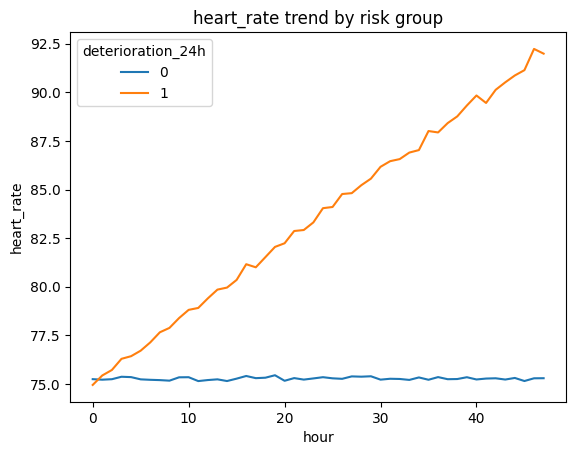

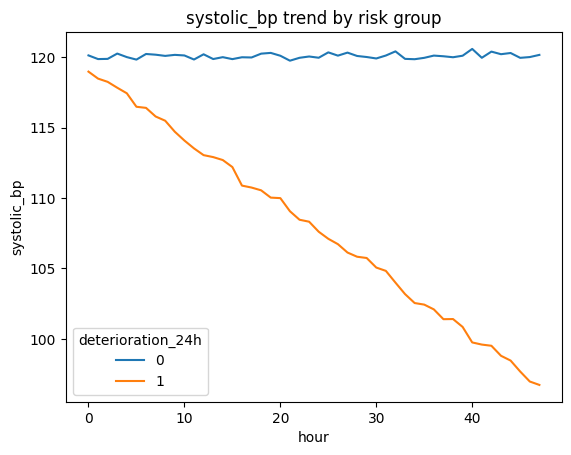

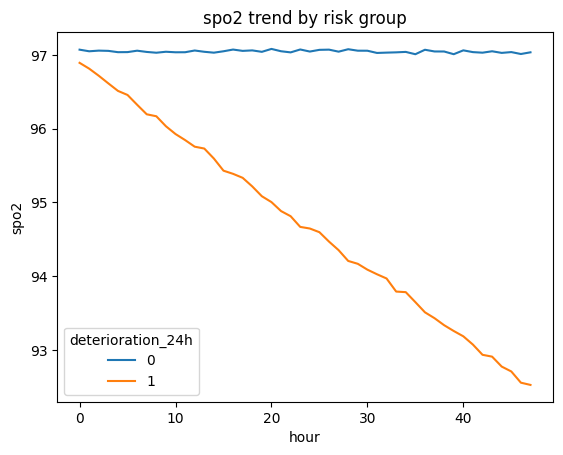

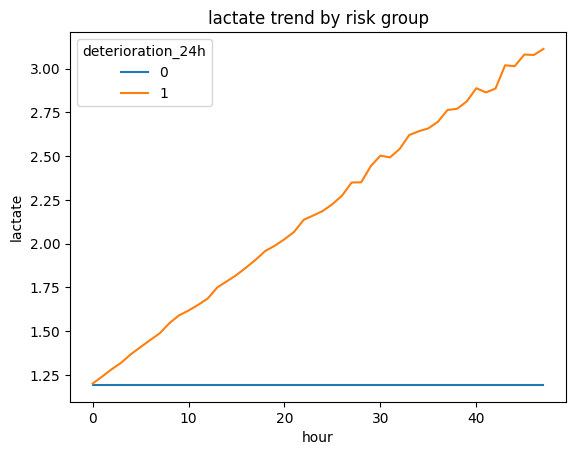

In [36]:
for feature in features:
    plt.figure()
    sns.lineplot(
        data=avg_trends,
        x="hour",
        y=feature,
        hue="deterioration_24h"
    )
    plt.title(f"{feature} trend by risk group")
    plt.show()

In [37]:
last_step = df[df["hour"] == df["hour"].max()]

last_step.groupby("deterioration_24h")[features].mean()

,heart_rate,systolic_bp,spo2,lactate
deterioration_24h,,,,
0,75.296336,120.166409,97.037448,1.192729
1,91.992161,96.730415,92.524006,3.113187


In [38]:
feature_cols = [
    "heart_rate",
    "systolic_bp",
    "diastolic_bp",
    "respiratory_rate",
    "spo2",
    "temperature",
    "creatinine",
    "wbc",
    "lactate"
]

target_col = "deterioration_24h"

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[feature_cols] = scaler.fit_transform(df[feature_cols])

In [ ]:
# import joblib

# joblib.dump(scaler, r"\HealthAI\models\sequence_model\sequence_scaler.pkl")

['D:\\Guvi\\Project\\HealthAI\\models\\sequence_model\\sequence_scaler.pkl']

In [41]:
X = []
y = []

for patient_id, group in df.groupby("patient_id"):
    group = group.sort_values("hour")
    
    X.append(group[feature_cols].values)
    y.append(group[target_col].iloc[0])  # patient-level label

In [42]:
X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 48, 9)
y shape: (1000,)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)


(700, 48, 9) (150, 48, 9) (150, 48, 9)


In [44]:
# Use last timestep only
X_last = X[:, -1, :]   # shape: (patients, features)

print(X_last.shape)

(1000, 9)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

baseline_model = LogisticRegression(max_iter=1000)

baseline_model.fit(X_train[:, -1, :], y_train)

y_pred = baseline_model.predict(X_test[:, -1, :])
y_prob = baseline_model.predict_proba(X_test[:, -1, :])[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        43

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

ROC-AUC: 1.0


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
rnn_model = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

rnn_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

rnn_model.summary()

In [48]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history_rnn = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8786 - loss: 0.2795 - val_accuracy: 0.9733 - val_loss: 0.0893
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9757 - loss: 0.0938 - val_accuracy: 0.9800 - val_loss: 0.0744
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9857 - loss: 0.0667 - val_accuracy: 0.9867 - val_loss: 0.0576
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9871 - loss: 0.0503 - val_accuracy: 0.9800 - val_loss: 0.0583
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9914 - loss: 0.0378 - val_accuracy: 0.9933 - val_loss: 0.0341
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9929 - loss: 0.0276 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9986 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9986 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss

In [49]:
from sklearn.metrics import accuracy_score, f1_score

y_prob_rnn = rnn_model.predict(X_test).ravel()
y_pred_rnn = (y_prob_rnn > 0.5).astype(int)

print(classification_report(y_test, y_pred_rnn))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rnn))

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000204AB6EF560> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        43

    accuracy                     

In [ ]:
from tensorflow.keras.layers import LSTM
lstm_model = Sequential([
    LSTM(64, return_sequences=True,
         input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

lstm_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

lstm_model.summary()



In [51]:
history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9200 - loss: 0.3047 - val_accuracy: 0.9867 - val_loss: 0.0784
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9929 - loss: 0.0366 - val_accuracy: 0.9933 - val_loss: 0.0220
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9971 - loss: 0.0133 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9933 - val_loss: 0.0087
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0063


In [52]:
y_prob_lstm = lstm_model.predict(X_test).ravel()
y_pred_lstm = (y_prob_lstm > 0.5).astype(int)

print(classification_report(y_test, y_pred_lstm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lstm))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.96      1.00      0.98        43

    accuracy                           0.99       150
   macro avg       0.98      0.99      0.98       150
weighted avg       0.99      0.99      0.99       150

ROC-AUC: 1.0


In [53]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "RNN", "LSTM"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob),
        roc_auc_score(y_test, y_prob_rnn),
        roc_auc_score(y_test, y_prob_lstm)
    ]
})

results

,Model,ROC-AUC
0,Logistic Regression,1.0
1,RNN,1.0
2,LSTM,1.0


In [ ]:
rnn_model.save(r"\HealthAI\models\sequence_model\sequence_model.h5")